<a href="https://colab.research.google.com/github/Inspiring26/colab/blob/master/svm%E5%86%B3%E7%AD%96%E6%A0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm , datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


data = datasets.load_iris()
y = data.target
X_train, X_test, y_train, y_test = train_test_split(data.data,y,test_size=0.3)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)



X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


先写出一个分类树作为别人的原始结构（）

In [0]:
import math
# Tree Node
class TN:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
    def __str__(self):
        return str(self.data)


# Full Binary Tree
class FBT:
    def __init__(self, ls):
        self.nodes = [TN(i) for i in ls]
        for i in range(len(self.nodes)-1, 0, -1):
            if i % 2 == 0:
                self.nodes[int(i/2-1)].right = self.nodes[i]
            else:
                self.nodes[int(i/2)].left = self.nodes[i]
        #self.tree()
    # 树结构
    def tree(self):
        # 节点数
        length = len(self.nodes)
        # 总层数
        layers = math.ceil(math.log2(length))
        # 总宽度
        width = 2 ** layers - 1
        # 分隔符
        branch = ' '
        # 初始化顶层,并打印
        layer = [self.nodes[0].data]
        interval = 2 ** layers - 1
        for i in range(2, length + 1):
            if math.log2(i) % 1 == 0:
                # 打印当前层
                print((branch * interval).join(layer).center(width))
                layer = []
            # 元素进入当前层
            layer.append(self.nodes[i - 1].data)
            # 节点间空隙
            interval = 2 ** (layers - int(math.log2(i))) - 1
        # 打印底层
        print(branch.join(layer))




In [3]:
# lsA_F = [chr(i) for i in range(65, 71)]
# print(lsA_F)
lsA_F = list(set(y))
print(lsA_F)

[0, 1, 2]


In [4]:
all_nodes_list = [lsA_F,]
queue_list = [lsA_F,]
print(queue_list)
while queue_list:
    len_ = len(queue_list[0])
    mid = 2**math.ceil(math.log2(len_/2))

    all_nodes_list.append(queue_list[0][:mid])
    all_nodes_list.append(queue_list[0][mid:])
    if mid>1 :
        queue_list.append(queue_list[0][:mid])
    if (len_ - mid) > 1 :
        queue_list.append(queue_list[0][mid:])
    queue_list.pop(0)

    
print(all_nodes_list)
    

[[0, 1, 2]]
[[0, 1, 2], [0, 1], [2], [0], [1]]


In [5]:
# 这一段仅仅是为了显示，使用的是str不影响原程序
all_nodes_list_string = [str(i) for i in all_nodes_list]
fbt = FBT(all_nodes_list_string)
fbt.tree()

[0, 1, 2]
[0, 1]   [2]
[0] [1]


In [6]:
# 这里是一个字典，目前不使用
int_other_dict={}
other_int_dict={}
for i,value in enumerate(list(set(y))):
  int_other_dict[i]=value
  other_int_dict[value]=i
print(int_other_dict,other_int_dict)
  

{0: 0, 1: 1, 2: 2} {0: 0, 1: 1, 2: 2}


In [7]:
# set_len = len(list(set(y)))
# all_nodes_list_len = len(all_nodes_list)

models_list = []
for i,l in enumerate(all_nodes_list):
  if len(l)>1:
    mid_ = 2**math.ceil(math.log2(len(l)/2))
    left_list, right_list = l[:mid_],l[mid_:]
    print(left_list, right_list)
    # 创建新的训练数据集和新的标签集
    letf_train_data, right_train_data =[], []
    for x in range(len(y_train)):
      if y_train[x] in left_list:
        letf_train_data.append((X_train[x]))
      elif y_train[x] in right_list:
        right_train_data.append((X_train[x]))
    new_train_data = letf_train_data+right_train_data
    new_target = [0]*len(letf_train_data)+[1]*len(right_train_data)
    model = svm.SVC(kernel='rbf',decision_function_shape='ovo',C=1,gamma=2**-5)
#     print(new_train_data)
    model.fit(new_train_data,new_target)
#     print(model)
    models_list.append(model)

      
# 完成训练，得到models_list
print(models_list) 
  

[0, 1] [2]
[0] [1]
[SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.03125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.03125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]


In [0]:
# 给每一个单独的列表分类
def class_for_each(inlist):
  step = 0
  while True:
    bl = models_list[step].predict([inlist])
  #   print(bl)
    if bl:
      step = (step+1)*2
    else:
      step = (step+1)*2-1
#     print(step)
    if len(all_nodes_list[step])<2:
      return int(all_nodes_list[step][0])
      


In [0]:
y_test=[x for x in y_test]
y_test_pred = [class_for_each(x) for x in X_test]

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("正确分类：\n",y_test)
print("模型分类：\n",y_test_pred)
print("准确率：\n",accuracy_score(y_test,y_test_pred))
print("量化结果：\n",classification_report(y_test,y_test_pred))

正确分类：
 [0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0]
模型分类：
 [0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0]
准确率：
 0.9555555555555556
量化结果：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Confusion Matrix for Non-Linear SVM (Gaussian RBF)

Confusion matrix without normalization
[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.93 0.07]
 [0.   0.07 0.93]]


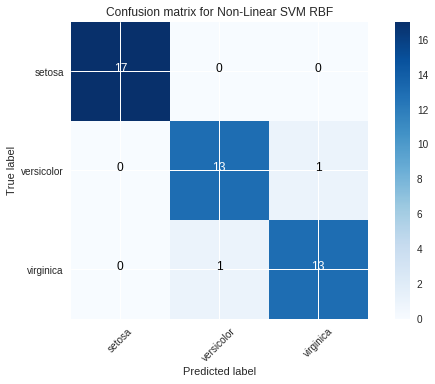

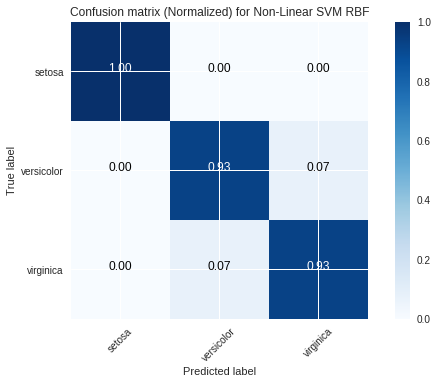

In [11]:
import matplotlib.pyplot as plt
import itertools
''' Following is the method for plotting the confusion matrix as a CMAP Plot (Matplotlib library module)'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # 'cm' is the computed confusion matrix being passed as parameter
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm) # Printing out the computed confusion matrix
    ''' DEfining parameters for plt '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    ''' Using itertools module to  '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Computing the confusion matrix with respect to Gini Index prediction
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names,
                      title='Confusion matrix for Non-Linear SVM RBF')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names, normalize=True,
                      title='Confusion matrix (Normalized) for Non-Linear SVM RBF')

plt.show()